Thinking1：为什么我们需要在神经网络中使用非线性激活函数


**如果使用线性激活函数或者不使用激活函数，那么无论你的神经网络有多少层，一直在做的也只是计算线性函数，表达能力不够强**

Thinking2：逻辑回归Logistic Loss是什么，解决分类问题 or 回归问题

**解决分类问题**

### Action1：使用numpy编写神经网络，完成boston房价预测问题

In [46]:
from sklearn.datasets import load_boston 
import numpy as np
import matplotlib.pyplot as plt
def load_data():   
    data1 = load_boston()
    temp1 = (data1)['data']    
    temp2 =(data1)['target'][:, np.newaxis]
    print(temp2.shape)

    # 将13个特征和一个标签拼成一个大矩阵
    data = np.hstack((temp1,temp2))

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算train数据集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]
    # 对数据进行归一化处理
    for i in range(data.shape[1]):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - avgs[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

### 修改

(506, 1)


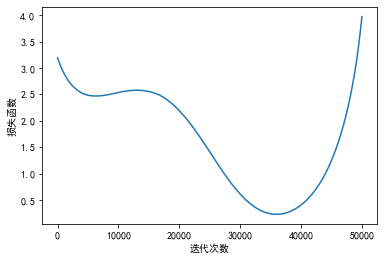

w1 = [[-1.12066809 -0.05560125  1.56254881 -0.79259637 -0.56585845 -0.31344767
   0.25956291  0.49606333  1.26064615  0.49922422]
 [-0.09460359  1.26101552  0.7274505  -1.4818753   2.51345551  1.75322815
  -0.14208139  0.32143129  1.30204663 -0.17314904]
 [ 0.71019447  1.01302204 -1.07031898 -0.60041226  0.92283182  0.45112563
   0.87624858 -0.14059358 -0.29614417 -2.00303366]
 [-1.11149904 -0.00808231  0.76497792  0.49634308 -0.12666605 -0.27289471
   0.18916355 -0.02118366  1.25239094  0.15216091]
 [-1.49136207 -1.36451559  1.45900166 -1.16289422  0.76574408 -0.28322769
  -0.21107519 -0.15747864  1.18936901 -0.19661487]
 [-0.02461259 -1.51277616  0.22567877  0.52844018  0.23670959  1.39525051
   0.06751154  0.26256106  1.62063659 -1.5527056 ]
 [-0.46590831  1.32962428  0.86458885  0.66238096  0.83646239  0.31778254
   1.57503711  0.32932899  0.20085178  0.16062881]
 [ 0.19316434 -1.09989625  0.80357259 -0.12783974  1.8167787  -0.07130515
   0.45034406  0.26309426 -0.60644811  0.99359

In [66]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)       
        self.n_hidden = 10
        self.w1 = np.random.randn(num_of_weights,n_hidden)  # 设置随机的权重
        self.b1 = np.zeros(n_hidden)  # 这里偏置为0
        self.w2 = np.random.rand(n_hidden,1)  # 这里因为输出只有一个模型，所以输出维度为1
        self.b2 = np.zeros(1)
                   
    def Relu(self,x):
        return np.where(x < 0,0,x)
    
    def MSE_loss(self, y,y_pred):
        return np.mean(np.square(y_pred - y))
        
    def Linear(self,x,w,b):
        z = x.dot(w) + b
        return z
    
    def back_gradient(self, y_pred, y,s1):
        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = s1.T.dot(grad_y_pred)
        grad_temp_relu = grad_y_pred.dot(self.w2.T)
        grad_temp_relu[l1 < 0] = 0
        grad_w1 = x.T.dot(grad_temp_relu) 
        return grad_w1, grad_w2
    
    def update(self, grad_w1,rad_w2,learning_rate):
        self.w1 -= learning_rate * grad_w1
        self.w2 -= learning_rate * grad_w2      
            
    def train(self, x, y, iterations, learning_rate):
        losses = []  # 记录每次迭代损失值
        for t in range(num_iterations):
            # 前向传播
            l1 = self.Linear(x,self.w1,self.b1)
            s1 = self.Relu(l1)
            y_pred = self.Linear(s1,self.w2,self.b2)
            # 计算损失函数
            loss = MSE_loss(y,y_pred)
            losses.append(loss)
            # 反向传播
            grad_w1,grad_w2 = self.back_gradient(y_pred, y,s1)
            # 权重更新
            self.update(grad_w1,grad_w2,learning_rate)          
        return losses
        
# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]

# 创建网络
net = Network(13)
num_iterations=50000
# 启动训练
losses = net.train(x,y, iterations = num_iterations, learning_rate = 1e-6)

# 画出损失函数的变化趋势    
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(plot_x, plot_y)
plt.xlabel('迭代次数')
plt.ylabel('损失函数')
plt.show()
print('w1 = {}\n w2 = {}'.format(w1,w2))